In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

In [3]:
# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [5]:
#Data from your analysis
models = ['GPT-o4-mini', 'Qwen-3-coder', 'Claude-4-sonnet']
model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Mean performance data
metrics_data = {
    'ROUGE-1': [0.6545, 0.7063, 0.7129],
    'ROUGE-2': [0.5278, 0.5998, 0.6035],
    'ROUGE-L': [0.5943, 0.6605, 0.6654],
    'BLEU': [0.4753, 0.5140, 0.5230],
    'CodeBERT-F1': [0.8700, 0.8921, 0.8933],
    'TSED': [0.8139, 0.8339, 0.8333]
}

# Standard deviations for error bars
std_data = {
    'ROUGE-1': [0.1872, 0.1975, 0.1981],
    'ROUGE-2': [0.2208, 0.2300, 0.2319],
    'ROUGE-L': [0.2038, 0.2107, 0.2103],
    'BLEU': [0.1892, 0.2108, 0.2045],
    'CodeBERT-F1': [0.0694, 0.0704, 0.0702],
    'TSED': [0.0655, 0.0726, 0.0726]
}

In [6]:
# Figure 1: Main Metrics Comparison Bar Chart
def create_main_metrics_comparison():
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x = np.arange(len(metrics_data))
    width = 0.25
    
    for i, model in enumerate(models):
        means = [metrics_data[metric][i] for metric in metrics_data.keys()]
        stds = [std_data[metric][i] for metric in metrics_data.keys()]
        
        bars = ax.bar(x + i*width, means, width, 
                     label=model, color=model_colors[i], alpha=0.8,
                     yerr=stds, capsize=5, error_kw={'linewidth': 1.5})
        
        # Add value labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + stds[j] + 0.01,
                   f'{means[j]:.3f}', ha='center', va='bottom', fontsize=9)
    
    ax.set_xlabel('Similarity Metrics', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title('LLM Performance Comparison on Code Generation Similarity Metrics', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x + width)
    ax.set_xticklabels(metrics_data.keys(), rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylim(0, 1.0)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('main_metrics_comparison.pdf', bbox_inches='tight', dpi=300)
    plt.savefig('main_metrics_comparison.png', bbox_inches='tight', dpi=300)
    return fig

In [7]:
# Figure 2: CodeBLEU Components Analysis
def create_codebleu_analysis():
    codebleu_metrics = {
        'CodeBLEU': [0.4563, 0.4832, 0.4955],
        'N-gram Match': [0.3443, 0.4108, 0.4192],
        'Weighted N-gram': [0.4468, 0.4917, 0.4914],
        'Syntax Match': [0.4904, 0.4906, 0.5056],
        'Dataflow Match': [0.5058, 0.4999, 0.5040]
    }
    
    codebleu_stds = {
        'CodeBLEU': [0.1613, 0.1784, 0.1722],
        'N-gram Match': [0.2158, 0.2322, 0.2316],
        'Weighted N-gram': [0.2243, 0.2249, 0.2225],
        'Syntax Match': [0.1559, 0.1825, 0.1752],
        'Dataflow Match': [0.2566, 0.2684, 0.2714]
    }
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x = np.arange(len(codebleu_metrics))
    width = 0.25
    
    for i, model in enumerate(models):
        means = [codebleu_metrics[metric][i] for metric in codebleu_metrics.keys()]
        stds = [codebleu_stds[metric][i] for metric in codebleu_metrics.keys()]
        
        bars = ax.bar(x + i*width, means, width, 
                     label=model, color=model_colors[i], alpha=0.8,
                     yerr=stds, capsize=5, error_kw={'linewidth': 1.5})
        
        # Add value labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + stds[j] + 0.01,
                   f'{means[j]:.3f}', ha='center', va='bottom', fontsize=9)
    
    ax.set_xlabel('CodeBLEU Components', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title('CodeBLEU Component Analysis for LLM-Generated Code', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x + width)
    ax.set_xticklabels(codebleu_metrics.keys(), rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylim(0, 0.8)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('codebleu_analysis.pdf', bbox_inches='tight', dpi=300)
    plt.savefig('codebleu_analysis.png', bbox_inches='tight', dpi=300)
    return fig

In [8]:
# Figure 3: Performance Radar Chart
def create_radar_chart():
    from math import pi
    
    # Normalize metrics to 0-1 scale for better visualization
    normalized_metrics = {}
    for metric in metrics_data:
        max_val = max(metrics_data[metric])
        min_val = min(metrics_data[metric])
        normalized_metrics[metric] = [(val - min_val) / (max_val - min_val) 
                                    for val in metrics_data[metric]]
    
    # Set up radar chart
    categories = list(normalized_metrics.keys())
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    for i, model in enumerate(models):
        values = [normalized_metrics[cat][i] for cat in categories]
        values += values[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, 
               label=model, color=model_colors[i])
        ax.fill(angles, values, alpha=0.25, color=model_colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 1)
    ax.set_title('Normalized Performance Comparison Across All Metrics', 
                fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.savefig('performance_radar.pdf', bbox_inches='tight', dpi=300)
    plt.savefig('performance_radar.png', bbox_inches='tight', dpi=300)
    return fig


In [9]:
# Figure 4: Box Plot Distribution Comparison (you'll need raw data for this)
def create_boxplot_if_data_available(raw_data_dict):
    """
    Create box plots if raw data is available
    raw_data_dict should be in format: {'metric': {'model': [values]}}
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    metrics_list = list(metrics_data.keys())
    
    for i, metric in enumerate(metrics_list):
        ax = axes[i]
        
        if metric in raw_data_dict:
            data_for_box = [raw_data_dict[metric][model.lower().replace('-', '_')] 
                          for model in ['gpt_o4_mini', 'qwen_3_coder', 'claude_4_sonnet']]
            
            box_plot = ax.boxplot(data_for_box, labels=models, patch_artist=True)
            
            for patch, color in zip(box_plot['boxes'], model_colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
        
        ax.set_title(metric, fontweight='bold')
        ax.set_ylabel('Score')
        ax.grid(axis='y', alpha=0.3)
        ax.set_xticklabels(models, rotation=45)
    
    plt.suptitle('Distribution Comparison Across Models', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('distributions_comparison.pdf', bbox_inches='tight', dpi=300)
    plt.savefig('distributions_comparison.png', bbox_inches='tight', dpi=300)
    return fig

All plots generated successfully!
Files created:
- main_metrics_comparison.pdf/.png
- codebleu_analysis.pdf/.png
- performance_radar.pdf/.png


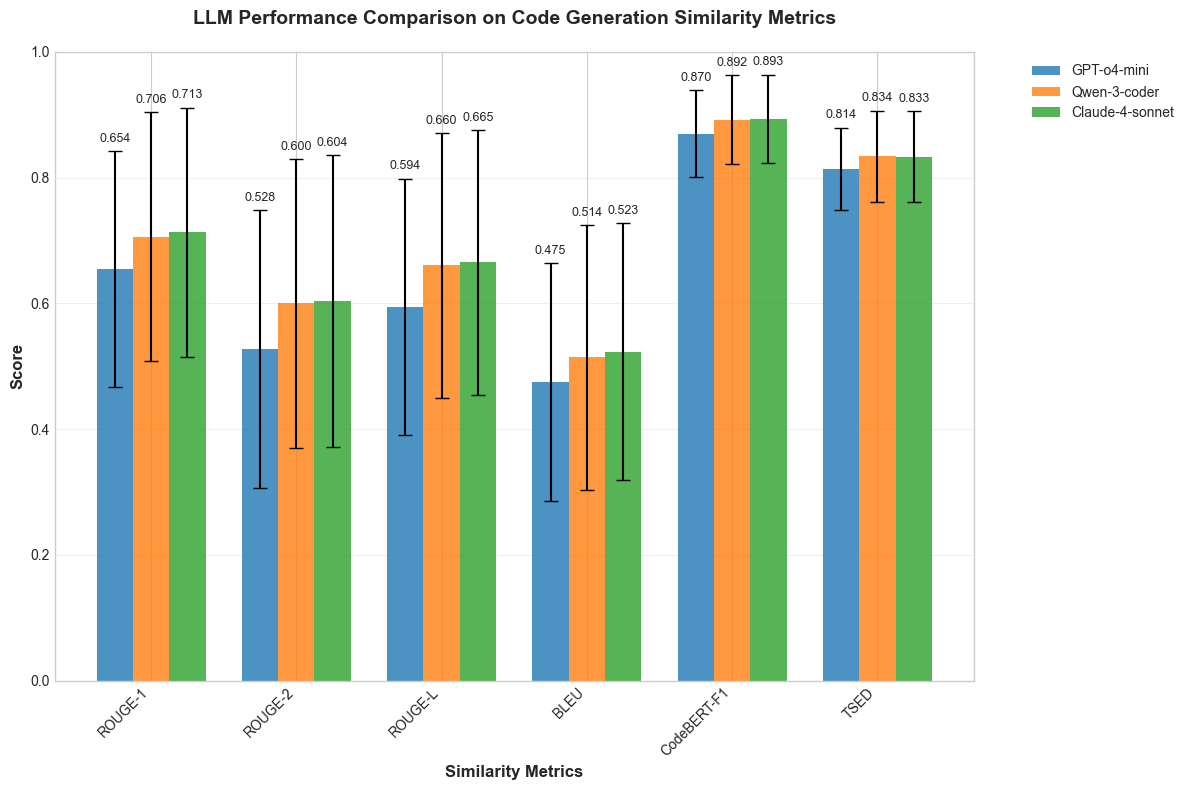

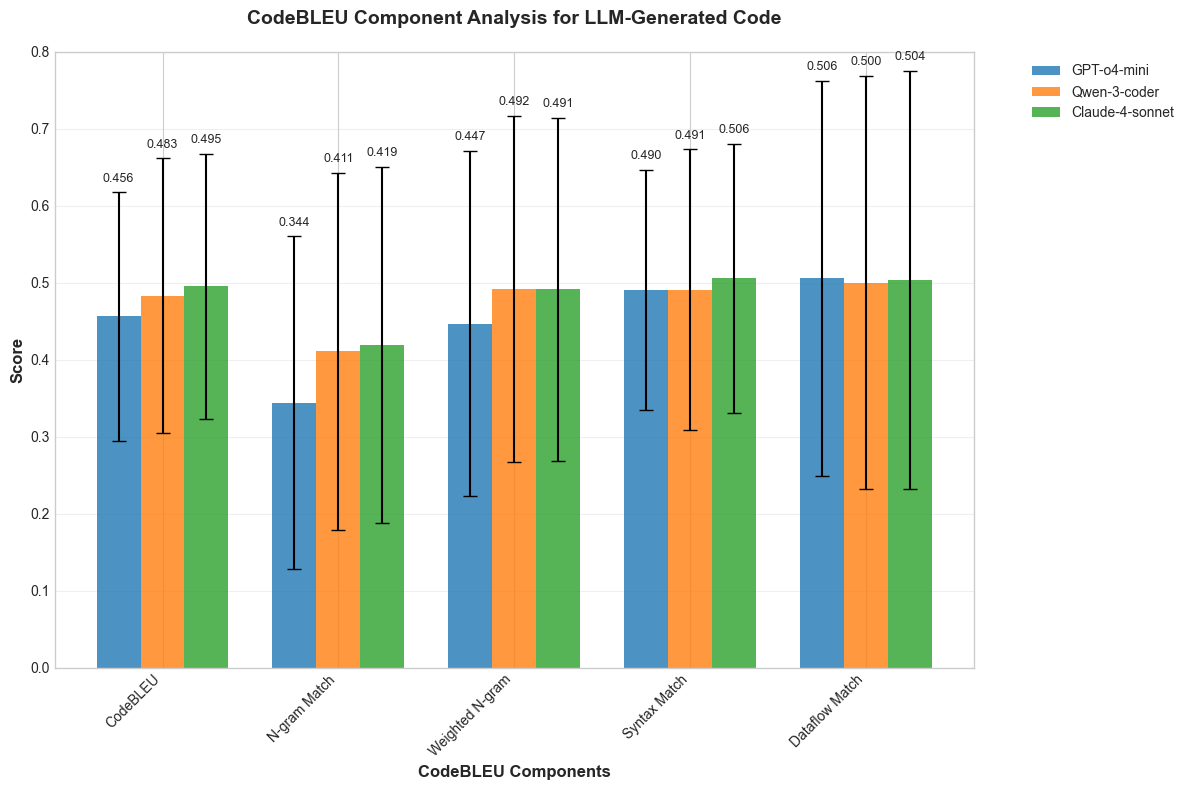

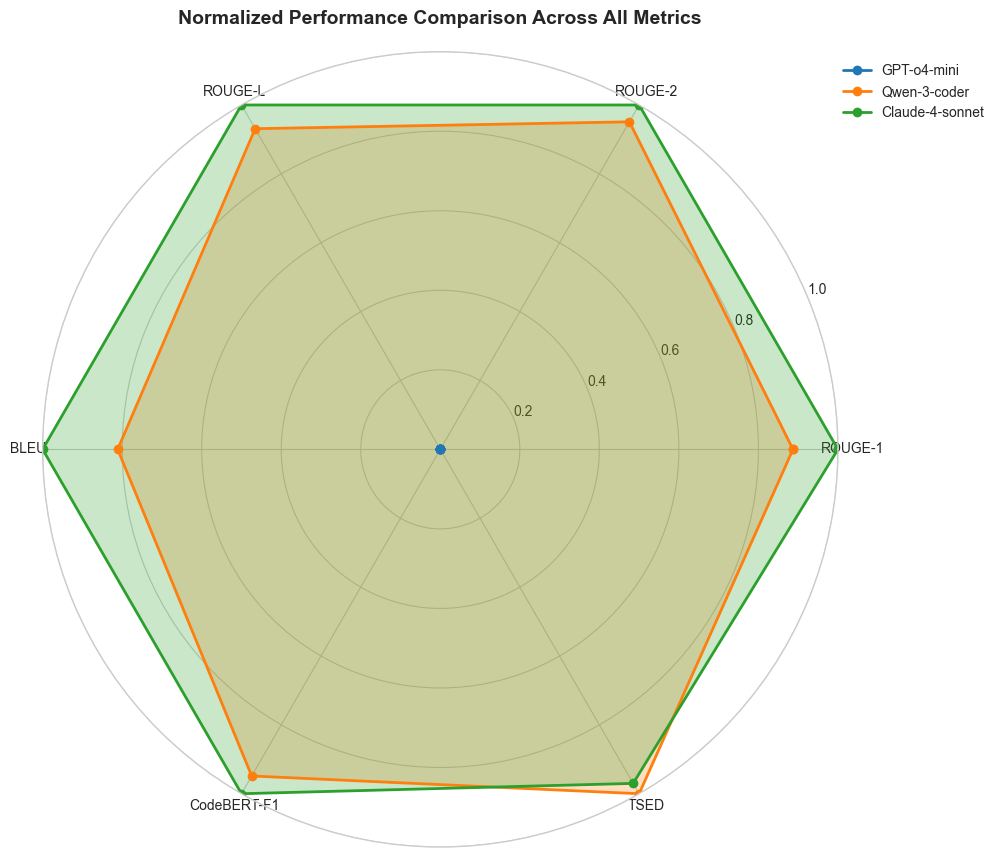

In [10]:
# Create all visualizations
fig1 = create_main_metrics_comparison()
fig2 = create_codebleu_analysis()
fig3 = create_radar_chart()

print("All plots generated successfully!")
print("Files created:")
print("- main_metrics_comparison.pdf/.png")
print("- codebleu_analysis.pdf/.png") 
print("- performance_radar.pdf/.png")

# Show plots
plt.show()